In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Que cherchons nous à faire:
* Convertir les colonnes de taille(Height) et de poids(Weight) en formes numériques
* Supprimez les caractères de nouvelle ligne inutiles de toutes les colonnes qui en contiennent.
* Grâce à la colonne «Joined », vérifiez quels joueurs jouent dans un club depuis plus de 10 ans !
* "Value", "Wage" et "Release Clause" sont des colonnes de chaîne. Convertissez-les en nombres. Par exemple, "M" dans la colonne de valeur est Million, multipliez donc les valeurs des lignes par 1 000 000, etc.
* Certaines colonnes comportent des caractères «★». Supprimez ces colonnes de ces étoiles et rendez les colonnes numériques
* Quels joueurs sont très précieux mais toujours sous-payés (avec de bas salaires) ? 

In [2]:
df = pd.read_csv('fifa21_raw_data.csv', sep=',')
df.head(3)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
photoUrl            18979 non-null object
LongName            18979 non-null object
playerUrl           18979 non-null object
Nationality         18979 non-null object
Positions           18979 non-null object
Name                18979 non-null object
Age                 18979 non-null int64
↓OVA                18979 non-null int64
POT                 18979 non-null int64
Team & Contract     18979 non-null object
ID                  18979 non-null int64
Height              18979 non-null object
Weight              18979 non-null object
foot                18979 non-null object
BOV                 18979 non-null int64
BP                  18979 non-null object
Growth              18979 non-null int64
Joined              18979 non-null object
Loan Date End       1013 non-null object
Value               18979 non-null object
Wage                18979 non-null object
Release Clause  

In [4]:
df.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

### On subdivise notre DataFrame en sous-ensemble vu le nombre de colonne pour :
* Avoir une visoin générale de nos colonnes
* Detecter les éléments inutiles


In [5]:
Tab1 = df.iloc[:6, 0:11]
Tab1

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871
5,https://cdn.sofifa.com/players/188/545/21_60.png,Robert Lewandowski,http://sofifa.com/player/188545/robert-lewando...,Poland,ST,R. Lewandowski,31,91,91,\n\n\n\nFC Bayern München\n2014 ~ 2023\n\n,188545


In [6]:
Tab2 = df.iloc[:6, 11:24]
Tab2 

,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing
0,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85
1,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84
2,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13
3,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94
4,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85
5,"6'0""",176lbs,Right,91,ST,0,"Jul 1, 2014",NaN,€80M,€240K,€132M,423,71


In [7]:
Tab3 = df.iloc[:6, 24:37]
Tab3

,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed
0,95,70,91,88,470,96,93,94,91,96,451,91,80
1,95,90,82,86,414,88,81,76,77,92,431,87,91
2,11,15,43,13,109,12,13,14,40,30,307,43,60
3,82,55,94,82,441,88,85,83,93,92,398,77,76
4,87,62,87,87,448,95,88,89,81,95,453,94,89
5,94,85,84,89,407,85,79,85,70,88,407,77,78


In [8]:
Tab4 = df.iloc[:6, 37:49]
Tab4

,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions
0,91,94,95,389,86,68,72,69,94,347,44,40
1,87,95,71,444,94,95,84,78,93,353,63,29
2,67,88,49,268,59,78,41,78,12,140,34,19
3,78,91,76,408,91,63,89,74,91,408,76,66
4,96,91,83,357,80,62,81,50,84,356,51,36
5,77,93,82,420,89,84,76,86,85,391,81,49


In [9]:
Tab5 = df.iloc[:6, 49:61]
Tab5

,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking
0,93,95,75,96,91,32,35,24,54,6,11,15
1,95,82,84,95,84,28,32,24,58,7,11,15
2,11,65,11,68,57,27,12,18,437,87,92,78
3,88,94,84,91,186,68,65,53,56,15,13,5
4,87,90,92,93,94,35,30,29,59,9,9,15
5,94,79,88,88,96,35,42,19,51,15,6,12


In [10]:
Tab6 = df.iloc[:6, 61:78]
Tab6

,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273
5,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,\n182


In [11]:
Tab1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
photoUrl           6 non-null object
LongName           6 non-null object
playerUrl          6 non-null object
Nationality        6 non-null object
Positions          6 non-null object
Name               6 non-null object
Age                6 non-null int64
↓OVA               6 non-null int64
POT                6 non-null int64
Team & Contract    6 non-null object
ID                 6 non-null int64
dtypes: int64(4), object(7)
memory usage: 608.0+ bytes


In [12]:
Tab2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
Height            6 non-null object
Weight            6 non-null object
foot              6 non-null object
BOV               6 non-null int64
BP                6 non-null object
Growth            6 non-null int64
Joined            6 non-null object
Loan Date End     0 non-null object
Value             6 non-null object
Wage              6 non-null object
Release Clause    6 non-null object
Attacking         6 non-null int64
Crossing          6 non-null int64
dtypes: int64(4), object(9)
memory usage: 704.0+ bytes


In [13]:
Tab3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
Finishing           6 non-null int64
Heading Accuracy    6 non-null int64
Short Passing       6 non-null int64
Volleys             6 non-null int64
Skill               6 non-null int64
Dribbling           6 non-null int64
Curve               6 non-null int64
FK Accuracy         6 non-null int64
Long Passing        6 non-null int64
Ball Control        6 non-null int64
Movement            6 non-null int64
Acceleration        6 non-null int64
Sprint Speed        6 non-null int64
dtypes: int64(13)
memory usage: 704.0 bytes


In [14]:
Tab4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 12 columns):
Agility          6 non-null int64
Reactions        6 non-null int64
Balance          6 non-null int64
Power            6 non-null int64
Shot Power       6 non-null int64
Jumping          6 non-null int64
Stamina          6 non-null int64
Strength         6 non-null int64
Long Shots       6 non-null int64
Mentality        6 non-null int64
Aggression       6 non-null int64
Interceptions    6 non-null int64
dtypes: int64(12)
memory usage: 656.0 bytes


In [15]:
Tab5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 12 columns):
Positioning        6 non-null int64
Vision             6 non-null int64
Penalties          6 non-null int64
Composure          6 non-null int64
Defending          6 non-null int64
Marking            6 non-null int64
Standing Tackle    6 non-null int64
Sliding Tackle     6 non-null int64
Goalkeeping        6 non-null int64
GK Diving          6 non-null int64
GK Handling        6 non-null int64
GK Kicking         6 non-null int64
dtypes: int64(12)
memory usage: 656.0 bytes


In [16]:
Tab6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 16 columns):
GK Positioning    6 non-null int64
GK Reflexes       6 non-null int64
Total Stats       6 non-null int64
Base Stats        6 non-null int64
W/F               6 non-null object
SM                6 non-null object
A/W               6 non-null object
D/W               6 non-null object
IR                6 non-null object
PAC               6 non-null int64
SHO               6 non-null int64
PAS               6 non-null int64
DRI               6 non-null int64
DEF               6 non-null int64
PHY               6 non-null int64
Hits              6 non-null object
dtypes: int64(10), object(6)
memory usage: 848.0+ bytes


### Enlèvons  les éléments non essentiels sur notre DataFrame

In [17]:
# Enlèvons \n sur la colonne 'Hits'
df['Hits'] = df['Hits'].str.replace('\n', '')
df.head(3)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,86


In [18]:
# Enlèvons \n sur la colonne 'Team & Contract'
df['Team & Contract'] = df['Team & Contract'].str.replace('\n', '')
df.head(3)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,...,Medium,Low,5 ★,85,92,91,95,38,65,372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,...,High,Low,5 ★,89,93,81,89,35,77,344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,...,Medium,Medium,3 ★,87,92,78,90,52,90,86


In [19]:
df['Team & Contract'].head(3)

0       FC Barcelona2004 ~ 2021
1           Juventus2018 ~ 2022
2    Atlético Madrid2014 ~ 2023
Name: Team & Contract, dtype: object

In [20]:
# Supprimons les doublons
df = df.drop_duplicates()
df.head(9)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,...,Medium,Low,5 ★,85,92,91,95,38,65,372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,...,High,Low,5 ★,89,93,81,89,35,77,344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,...,Medium,Medium,3 ★,87,92,78,90,52,90,86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,...,High,High,4 ★,76,86,93,88,64,78,163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,...,High,Medium,5 ★,91,85,86,94,36,59,273
5,https://cdn.sofifa.com/players/188/545/21_60.png,Robert Lewandowski,http://sofifa.com/player/188545/robert-lewando...,Poland,ST,R. Lewandowski,31,91,91,FC Bayern München2014 ~ 2023,...,High,Medium,4 ★,78,91,78,85,43,82,182
6,https://cdn.sofifa.com/players/231/747/21_60.png,Kylian Mbappé,http://sofifa.com/player/231747/kylian-mbappe/...,France,ST LW RW,K. Mbappé,21,90,95,Paris Saint-Germain2018 ~ 2022,...,High,Low,3 ★,96,86,78,91,39,76,646
7,https://cdn.sofifa.com/players/212/831/21_60.png,Alisson Ramses Becker,http://sofifa.com/player/212831/alisson-ramses...,Brazil,GK,Alisson,27,90,91,Liverpool2018 ~ 2024,...,Medium,Medium,3 ★,86,88,85,89,51,91,79
8,https://cdn.sofifa.com/players/209/331/21_60.png,Mohamed Salah,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,RW,M. Salah,28,90,90,Liverpool2017 ~ 2023,...,High,Medium,3 ★,93,86,81,90,45,75,164


In [21]:
df.info() #  on constate qu'une ligne à été supprimé caron est passé de 18978 à 18978

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18978 entries, 0 to 18978
Data columns (total 77 columns):
photoUrl            18978 non-null object
LongName            18978 non-null object
playerUrl           18978 non-null object
Nationality         18978 non-null object
Positions           18978 non-null object
Name                18978 non-null object
Age                 18978 non-null int64
↓OVA                18978 non-null int64
POT                 18978 non-null int64
Team & Contract     18978 non-null object
ID                  18978 non-null int64
Height              18978 non-null object
Weight              18978 non-null object
foot                18978 non-null object
BOV                 18978 non-null int64
BP                  18978 non-null object
Growth              18978 non-null int64
Joined              18978 non-null object
Loan Date End       1013 non-null object
Value               18978 non-null object
Wage                18978 non-null object
Release Clause  

In [22]:
# Supprimons les colonnes inutiles
df = df.drop( ['photoUrl', 'playerUrl'], axis=1)
df.head(3)

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,"5'7""",...,Medium,Low,5 ★,85,92,91,95,38,65,372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,"6'2""",...,High,Low,5 ★,89,93,81,89,35,77,344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,"6'2""",...,Medium,Medium,3 ★,87,92,78,90,52,90,86


In [23]:
# Enlèvons ' et " sur les tailles en anglais pour en faire des nombres
df['Height'] = df['Height'].str.strip('"')
df.head(3)

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,5'7,...,Medium,Low,5 ★,85,92,91,95,38,65,372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,6'2,...,High,Low,5 ★,89,93,81,89,35,77,344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,6'2,...,Medium,Medium,3 ★,87,92,78,90,52,90,86


In [24]:
# Enlèvons aussi '
df['Height'] = df['Height'].astype(str).replace("'", '', regex=True)
df.head(3)

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,57,...,Medium,Low,5 ★,85,92,91,95,38,65,372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,62,...,High,Low,5 ★,89,93,81,89,35,77,344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,62,...,Medium,Medium,3 ★,87,92,78,90,52,90,86


In [25]:
# Enlèvons 'lbs' sur la colonne des poids
df['Weight'] = df['Weight'].str.replace('lbs', '')
df['Weight'].head(3)

0    159
1    183
2    192
Name: Weight, dtype: object

In [26]:
# Convertissons la taille et le poids en valeur umériques
df['Weight'] = df['Weight'].fillna(0).astype(int)
df['Height'] = df['Height'].fillna(0).astype(int)
df[['Height','Weight']].head(5)

,Height,Weight
0,57,159
1,62,183
2,62,192
3,511,154
4,59,150


In [27]:
df.info() # Observons que le type de ces valeurs a changé

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18978 entries, 0 to 18978
Data columns (total 75 columns):
LongName            18978 non-null object
Nationality         18978 non-null object
Positions           18978 non-null object
Name                18978 non-null object
Age                 18978 non-null int64
↓OVA                18978 non-null int64
POT                 18978 non-null int64
Team & Contract     18978 non-null object
ID                  18978 non-null int64
Height              18978 non-null int32
Weight              18978 non-null int32
foot                18978 non-null object
BOV                 18978 non-null int64
BP                  18978 non-null object
Growth              18978 non-null int64
Joined              18978 non-null object
Loan Date End       1013 non-null object
Value               18978 non-null object
Wage                18978 non-null object
Release Clause      18978 non-null object
Attacking           18978 non-null int64
Crossing           

In [28]:
# On observe que ces colonnes ont un symbole 'étoile' et nous voulons l'enlèver
df[['W/F', 'SM', 'IR']].head(10)

,W/F,SM,IR
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★
5,4 ★,4★,4 ★
6,4 ★,5★,3 ★
7,3 ★,1★,3 ★
8,3 ★,4★,3 ★
9,4 ★,4★,3 ★


In [29]:
# on utilise la méthode replace() pour remplacer ces étoiles par du vide  
df['W/F'] = df['W/F'].str.replace('★', '')
df['SM'] = df['SM'].str.replace('★', '')
df['IR'] = df['IR'].str.replace('★', '')
df[['W/F', 'SM', 'IR']].head(5)

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5


In [30]:
# Ici on utilise stype() car on a affaire à des strings ou objets et on les convertis en entiers
df['W/F'] = df['W/F'].fillna(0).astype(int)
df['SM'] = df['SM'].fillna(0).astype(int)
df['IR'] = df['IR'].fillna(0).astype(int)
df[['W/F', 'SM', 'IR']].head(5)

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5


In [31]:
# Nous allons diviser cette colonne en 03 colonnes(Team, Start contract, End contract)
df['Team & Contract'].head(3)

0       FC Barcelona2004 ~ 2021
1           Juventus2018 ~ 2022
2    Atlético Madrid2014 ~ 2023
Name: Team & Contract, dtype: object

In [32]:
# On divise d'abord 'Team & Contract' colonne en 02
df[['Team', 'End contract']] = df['Team & Contract'].str.split(' ~ ', expand=True)
df.head(3)

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,End contract
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,57,...,5,85,92,91,95,38,65,372,FC Barcelona2004,2021
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,62,...,5,89,93,81,89,35,77,344,Juventus2018,2022
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,62,...,3,87,92,78,90,52,90,86,Atlético Madrid2014,2023


In [33]:
df[['Team', 'End contract']].head(3) # nos deux nouvelles colonnes

,Team,End contract
0,FC Barcelona2004,2021
1,Juventus2018,2022
2,Atlético Madrid2014,2023


In [34]:
# str.extract(r'([^\d]+)'): Cela applique la méthode str.extract pour extraire
# une partie de la chaîne en utilisant une expression régulière.
#(\d{4}): Cela correspond à exactement quatre chiffres. 
#Les parenthèses autour de \d{4} indiquent qu'on veut capturer quatre chiffres.
df['team'] = df['Team'].str.extract(r'([^\d]+)')  
df['Start contract'] = df['Team'].str.extract(r'(\d{4})')
df[['team', 'Start contract']].head(3)

,team,Start contract
0,FC Barcelona,2004
1,Juventus,2018
2,Atlético Madrid,2014


In [35]:
df[['team', 'Start contract', 'End contract']].head(3)

,team,Start contract,End contract
0,FC Barcelona,2004,2021
1,Juventus,2018,2022
2,Atlético Madrid,2014,2023


In [36]:
# On peut supprimer ces colonnes elles ne nous intéressent plus
df = df.drop(['Team & Contract', 'Team'], axis=1)

In [37]:
df.dtypes 
# Si on veut savoir la durée de contrat de chaque joueurs on doit 
#convertir 'Start contract', 'End contract' en entier


LongName            object
Nationality         object
Positions           object
Name                object
Age                  int64
↓OVA                 int64
POT                  int64
ID                   int64
Height               int32
Weight               int32
foot                object
BOV                  int64
BP                  object
Growth               int64
Joined              object
Loan Date End       object
Value               object
Wage                object
Release Clause      object
Attacking            int64
Crossing             int64
Finishing            int64
Heading Accuracy     int64
Short Passing        int64
Volleys              int64
Skill                int64
Dribbling            int64
Curve                int64
FK Accuracy          int64
Long Passing         int64
                     ...  
Vision               int64
Penalties            int64
Composure            int64
Defending            int64
Marking              int64
Standing Tackle      int64
S

In [38]:
df.columns

Index(['LongName', 'Nationality', 'Positions', 'Name', 'Age', '↓OVA', 'POT',
       'ID', 'Height', 'Weight', 'foot', 'BOV', 'BP', 'Growth', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'End contract',
       'team', 'Start contract']

In [39]:
# Utiliser fillna() pour remplacer les valeurs manquantes NaN  par 0 avant la conversion en entier
df['Start contract'] = df['Start contract'].fillna(0).astype(int)
print(df['Start contract'].head(5))

0    2004
1    2018
2    2014
3    2015
4    2017
Name: Start contract, dtype: int32


In [40]:
df['End contract'] = df['End contract'].fillna(0).astype(int)
print(df['Start contract'].head(5))

0    2004
1    2018
2    2014
3    2015
4    2017
Name: Start contract, dtype: int32


In [41]:
# appliquons juste une soustraction pour determiner la durée de chaque contrat de joueur
# et ajoutons le résultat dans une nouvelle colonne
df['Contrat duration'] = df['End contract']- df['Start contract']
df['Contrat duration'].head(5)

0    17
1     4
2     9
3     8
4     5
Name: Contrat duration, dtype: int32

In [42]:
df.columns

Index(['LongName', 'Nationality', 'Positions', 'Name', 'Age', '↓OVA', 'POT',
       'ID', 'Height', 'Weight', 'foot', 'BOV', 'BP', 'Growth', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'End contract',
       'team', 'Start contract',

In [43]:
df.dtypes

LongName            object
Nationality         object
Positions           object
Name                object
Age                  int64
↓OVA                 int64
POT                  int64
ID                   int64
Height               int32
Weight               int32
foot                object
BOV                  int64
BP                  object
Growth               int64
Joined              object
Loan Date End       object
Value               object
Wage                object
Release Clause      object
Attacking            int64
Crossing             int64
Finishing            int64
Heading Accuracy     int64
Short Passing        int64
Volleys              int64
Skill                int64
Dribbling            int64
Curve                int64
FK Accuracy          int64
Long Passing         int64
                     ...  
Penalties            int64
Composure            int64
Defending            int64
Marking              int64
Standing Tackle      int64
Sliding Tackle       int64
G

In [44]:
# Nous voulons remplacer ces caractères alphanumériques pour en faire des valeurs numériques
df[['Value', 'Wage', 'Release Clause']].head(5)

,Value,Wage,Release Clause
0,€67.5M,€560K,€138.4M
1,€46M,€220K,€75.9M
2,€75M,€125K,€159.4M
3,€87M,€370K,€161M
4,€90M,€270K,€166.5M


### La fonction convert_money a pour rôle de :
* Supprimer les symbole € M K et de multiplier par 1000000 et 1000 chaque fois qu'ils apparaîssent
* Ces valeurs seront convertis en valeurs décimales d'ou le <font color='blue'>float()</font>
* La fonction <font color='green'>apply()</font> appliquera les modifications à chaque cellules de la colonne <font color='red'>df['Value']</font>

In [45]:
def convert_money(value):
    if 'M' in value:
        return float(value.replace('€', '').replace('M', '')) * 1000000
    elif 'K' in value:
        return float(value.replace('€', '').replace('K', '')) * 1000
    else:
        return float(value.replace('€', ''))

df['Value'] = df['Value'].apply(convert_money)
df['Value'].head(5)

0    67500000.0
1    46000000.0
2    75000000.0
3    87000000.0
4    90000000.0
Name: Value, dtype: float64

In [46]:
df['Wage'] = df['Wage'].apply(convert_money)
df['Wage'].head(5)

0    560000.0
1    220000.0
2    125000.0
3    370000.0
4    270000.0
Name: Wage, dtype: float64

In [47]:
df['Release Clause'] = df['Release Clause'].apply(convert_money)
df['Release Clause'].head(5)

0    138400000.0
1     75900000.0
2    159400000.0
3    161000000.0
4    166500000.0
Name: Release Clause, dtype: float64

In [48]:
# Résultat final
df[['Value','Wage','Release Clause']].head(10)

,Value,Wage,Release Clause
0,67500000.0,560000.0,138400000.0
1,46000000.0,220000.0,75900000.0
2,75000000.0,125000.0,159400000.0
3,87000000.0,370000.0,161000000.0
4,90000000.0,270000.0,166500000.0
5,80000000.0,240000.0,132000000.0
6,105500000.0,160000.0,203100000.0
7,62500000.0,160000.0,120300000.0
8,78000000.0,250000.0,144300000.0
9,78000000.0,250000.0,144300000.0


### Nuage de points pour déterminer :
* l'échelle salariale la plus basse des joueurs mais avec la valeur marchande la plus élevée

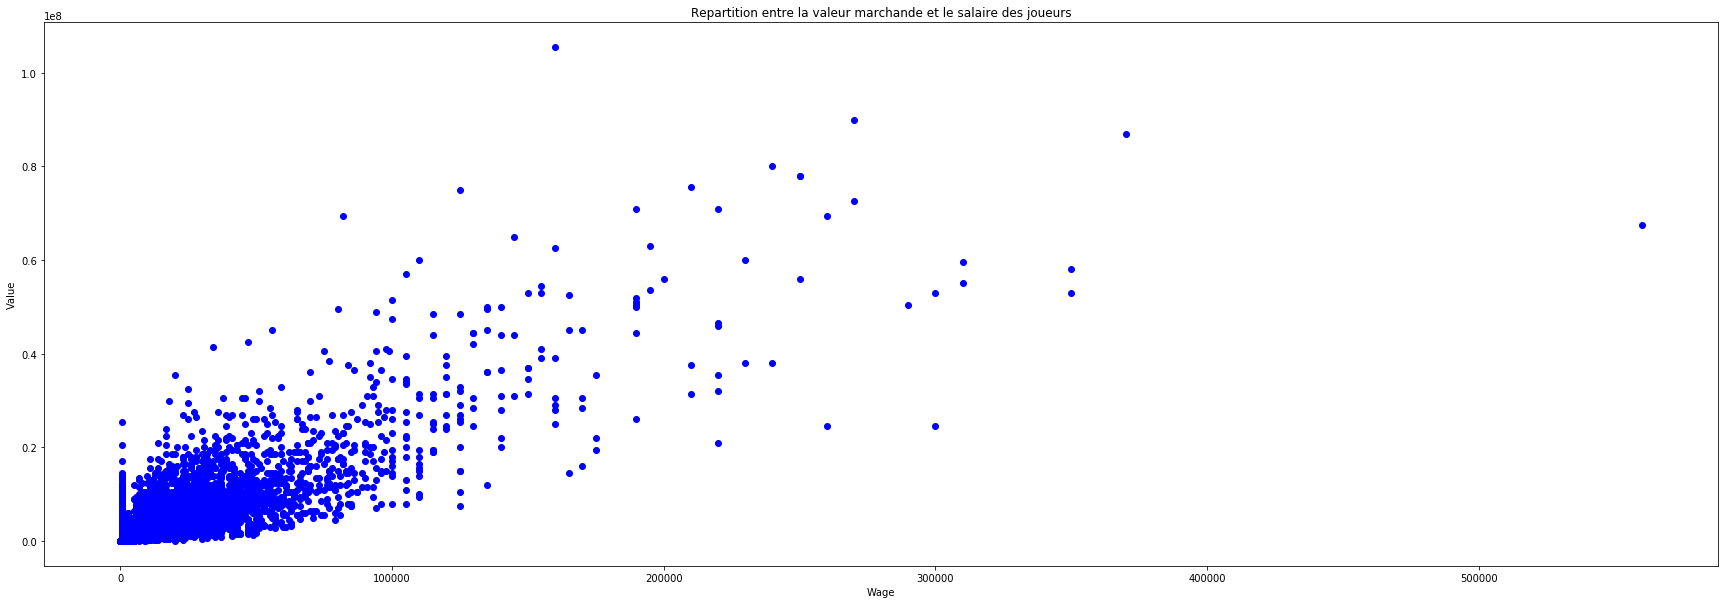

In [49]:
plt.rcParams['figure.figsize'] = (30, 10)
plt.scatter(x=df['Wage'], y=df['Value'], color='blue')

# Ajoutez des labels et un titre
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title('Repartition entre la valeur marchande et le salaire des joueurs')

plt.show()

##### Fixons un seuil pour observer des changements à partir d'une certaine valeur

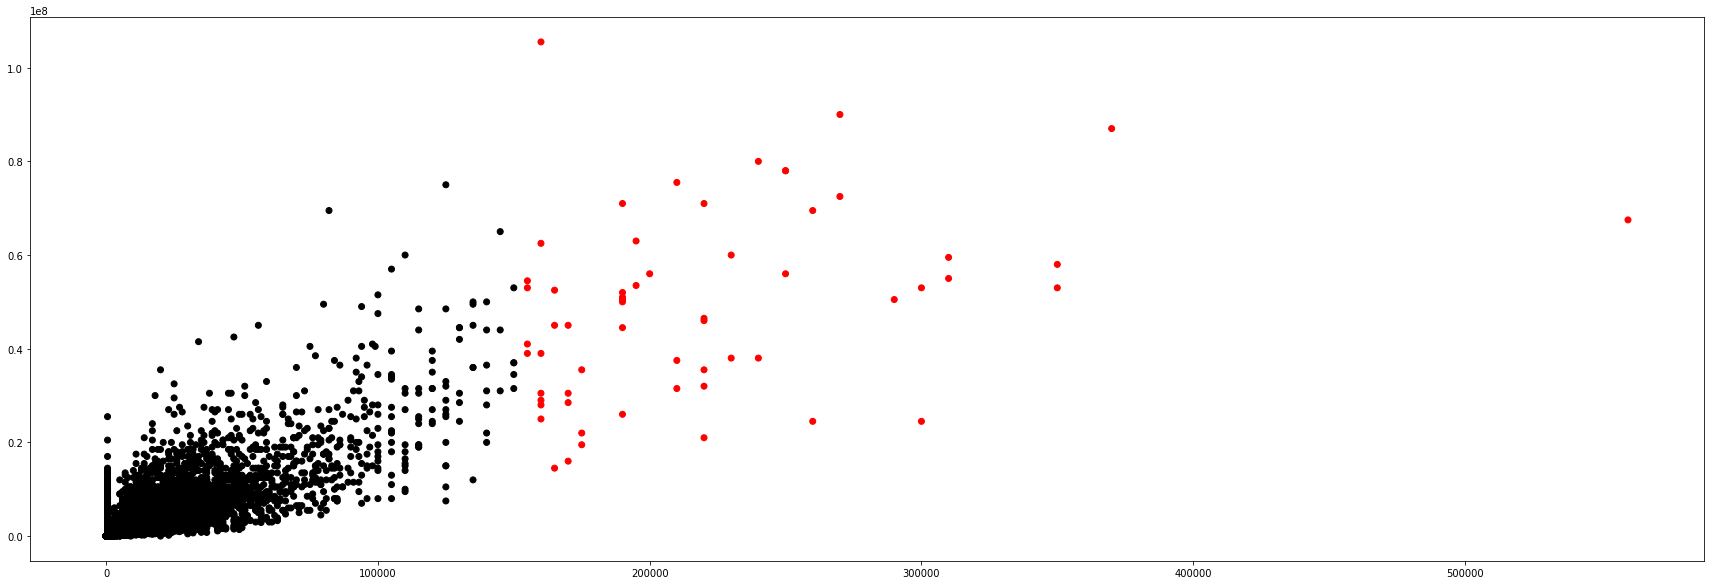

In [50]:
seuil = 150000

# Ajoutez une colonne 'Couleur' basée sur la condition du seuil
df['Couleur'] = df['Wage'].apply(lambda x: 'red' if x > seuil else 'black')

# Tracez le nuage de points en utilisant la colonne 'Couleur'
plt.scatter(x=df['Wage'], y=df['Value'], color=df['Couleur'])

# Affichez le graphique
plt.show()

In [51]:
df.to_csv('Fifa_v1_clean_version.csv', index=False) #exportons le nouveau DataFrame nettoyé